In [113]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import odeint
import sympy
from sympy import Symbol

# 1. Random Walks

#### (a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

#### (b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

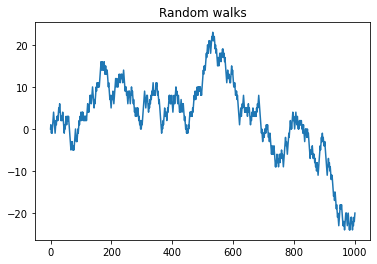

In [138]:
def Randomwalks(t):
    x = 0
    y = 0
    xposition = [0]
    yposition = [0]
    
    for i in range (1, t+1):
        step = np.random.uniform(0,1)
        
        if step < 0.5:
            x += 1
            y += 1
            
        if step > 0.5:
            x += 1
            y += -1
        
        xposition.append(x)
        yposition.append(y)
        
    return [xposition,yposition]

randomwalk = Randomwalks(1000)
plt.plot(randomwalk[0],randomwalk[1], label = "Random walks")
plt.title("Random walks")
plt.show()

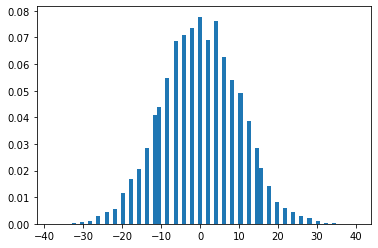

In [139]:
def Random_walk(n):
    x = 0
    y = 0
    xposition = [x]
    yposition = [y] 
 
    for i in range (1,n+1):
        step = np.random.uniform(0,1)
        
        if step < 0.5:    
            x += 1
            y += 1  
        
        if step > 0.5:    
            x += 1
            y += -1
        
        xposition.append(x)
        yposition.append(y)
    
    return [xposition,yposition], yposition[-1]

N = 10000
n = 100
X = []
for i in range(N):
    X.append(Random_walk(n)[1])

plt.hist(X, bins=75, density = True, alpha = 1)
plt.show()

# 2. Bifurcation

다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

#### (a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)
1. r=-1, x(0)=2
2. r=-1, x(0)=-2
3. r=1, x(0)=2
4. r=1, x(0)=-2

In [117]:
t = Symbol('t')
x = Function('x')

r = -1
Eq(x(t).diff(t),r*x(t)-x(t)**2)
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2), ics={x(0):2})

Eq(x(t), -2/(3*(2/3 - exp(t))))

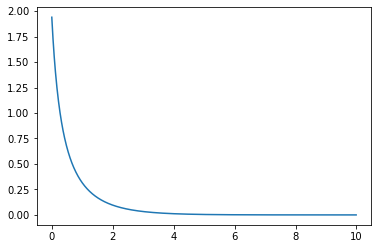

In [118]:
r = -1
dt = 0.01
t = np.arange(0,10,dt)
x = np.array([])
x0 = 2

for i in t:
    x0 = x0 + dt*r*x0-dt*x0**2
    x=np.append(x,x0)

plt.plot(t,x)

In [119]:
t = Symbol('t')
x = Function('x')

r = -1
Eq(x(t).diff(t),r*x(t)-x(t)**2)
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2), ics={x(0):-2})

Eq(x(t), -2/(2 - exp(t)))

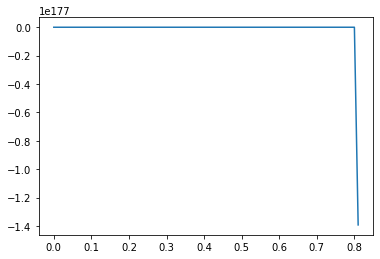

In [120]:
r = -1
dt = 0.01
t = np.arange(0,10,dt)
x = np.array([])
x0 = -2

for i in t:
    x0 = x0 + dt*r*x0-dt*x0*x0
    x=np.append(x,x0)

plt.plot(t,x)

In [121]:
t = Symbol('t')
x = Function('x')

r = 1
Eq(x(t).diff(t),r*x(t)-x(t)**2)
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2), ics={x(0):2})

Eq(x(t), 1/(1 - exp(-t)/2))

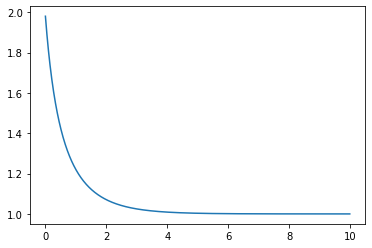

In [122]:
r = 1
dt = 0.01
t = np.arange(0,10,dt)
x = np.array([])
x0 = 2

for i in t:
    x0 = x0 + dt*r*x0-dt*x0**2
    x=np.append(x,x0)

plt.plot(t,x)

In [123]:
t = Symbol('t')
x = Function('x')

r = 1
Eq(x(t).diff(t),r*x(t)-x(t)**2)
dsolve(Eq(x(t).diff(t),r*x(t)-x(t)**2), ics={x(0):-2})

Eq(x(t), 1/(1 - 3*exp(-t)/2))

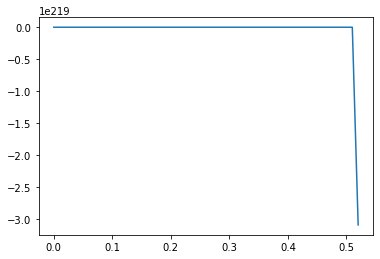

In [124]:
r = 1
dt = 0.01
t = np.arange(0,10,dt)
x = np.array([])
x0 = -2

for i in t:
    x0 = x0 + dt*r*x0-dt*x0*x0
    x=np.append(x,x0)

plt.plot(t,x)

#### (b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.$$ 0= rx -x^2 = x( r-x) $$

1. r=-1
2. r=1

In [125]:
r = -1
x = Symbol("x")
sympy.factor(r*x-x**2)

-x*(x + 1)

In [126]:
sympy.solve(r*x-x**2)

[-1, 0]

In [127]:
r = 1
x = Symbol("x")
sympy.factor(r*x-x**2)

-x*(x - 1)

In [128]:
sympy.solve(r*x-x**2)

[0, 1]